# Parcial 2: Introducción a la Ciencia de Datos

&emsp; **Fundación Universitaria Los Libertadores**. <br>
&emsp; **Asignatura:** Big Data. <br>
&emsp; **Período:** 2023-I. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Estudiante:**

# Big Data con sabor a Café

Los chismes vuelan: todo mundo ha oído que los estudiantes de Big Data de la FULL son los mejores analistas de datos. Por ello, le han contratado para realizar análisis de datos del alimento preferido por los y las analistas de datos: el Café. Para ello, le han entregado una base de datos sobre diferentes características de café de diferentes procedencias, la cual se encuentra en la siguiente [página web](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi).

Quienes le contratan le piden lo siguiente:

# 1. Importe de los datos (10 puntos)

En primer lugar, le envían la base de datos `df_arabica_clean.csv` que se encuentra en la carpeta. Cárguela y muestre las primeras 3 filas.

In [127]:
import pandas as pd

coffee = pd.read_csv(`datain/df_arabica_clean.csv`)
coffee.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


# 2. Calidad de los datos

## 2.1. Número de valores perdidos

Analice primero la cantidad de valores perdidos por columna **en términos de porcentaje** del total de la base de datos:

In [128]:
coffee.isnull().sum()/len(coffee)*100

Unnamed: 0                0.000000
ID                        0.000000
Country of Origin         0.000000
Farm Name                 0.966184
Lot Number                0.483092
Mill                      1.449275
ICO Number               63.768116
Company                   0.000000
Altitude                  0.483092
Region                    0.966184
Producer                  0.483092
Number of Bags            0.000000
Bag Weight                0.000000
In-Country Partner        0.000000
Harvest Year              0.000000
Grading Date              0.000000
Owner                     0.000000
Variety                   2.898551
Status                    0.000000
Processing Method         2.415459
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean Cup                 0.000000
Sweetness           

A partir de lo anterior,

* ¿Existe una pérdida considerable de datos?
* ¿Qué estrategia aplicaría para manejar los valores perdidos de la base de datos? Aplíquela.

## 2.2. Valores únicos

Ahora quieren saber cuántos valores únicos hay por variable:

* Muestre, por favor, el número de valores únicos que hay por variable.

In [129]:
coffee.nunique()

Unnamed: 0               207
ID                       207
Country of Origin         22
Farm Name                172
Lot Number               187
Mill                     162
ICO Number                67
Company                   72
Altitude                  97
Region                   120
Producer                 172
Number of Bags            55
Bag Weight                39
In-Country Partner        21
Harvest Year               7
Grading Date              75
Owner                     80
Variety                   48
Status                     1
Processing Method         10
Aroma                     19
Flavor                    19
Aftertaste                20
Acidity                   19
Body                      17
Balance                   18
Uniformity                 3
Clean Cup                  1
Sweetness                  1
Overall                   21
Defects                    1
Total Cup Points          81
Moisture Percentage       46
Category One Defects       6
Quakers       

De repente, en una de sus visitas de consultoría, una persona misteriosa le deja una nota que dice:

<center> <i>"No todo es lo que parece. Revise usted los valores únicos de la variable `Color`. Att: `el profe`."</i> </center>

Sin saber quién es el profe, usted encuentra que los valores únicos mienten. Revise cuáles son los valores únicos de la variable `Color`.


A partir de lo anterior le preguntan:

* ¿Qué observa de dicha columna?

# 3. Análisis Univariado

In [130]:
coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

## 3.1. Número de cargamentos de cada país

En primer lugar, quienes le contratan quieren saber cuántos cargamentos se han registrado por país:

* ¿Cuál es el país que más cargamentos registra en la base de datos?

In [131]:
coffee[['ID', 'Country of Origin']].groupby('Country of Origin').count()\
    .rename(columns = {'ID': 'n'})\
    .sort_values('n', ascending = False)

,n
Country of Origin,
Taiwan,61
Guatemala,21
Colombia,19
Honduras,13
Thailand,12
Ethiopia,11
Brazil,10
Costa Rica,8
Nicaragua,7


In [132]:
coffee.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

## 3.2. Puntajes de los cafés

Así mismo, quisieran saber cómo están calificados los cafés en algunos aspectos que se evalúan en la base de datos. Para ello le preguntan que encuentre para las variables de calificación de aroma (`Aroma`), sabor (`Flavor`), cuerpo (`Body`), dulzura (`Sweetness`) y la calificación total (`Overall`) lo siguiente:

* Distribución de las calificaciones de cada una de ellas.
* Promedio de cada una de ellas.
* Promedio de la calificación total (`Overall`) solamente de los cargamentos que provienen de Colombia y Etiopía: ¿cuál tiene la calificación promedio más alta?

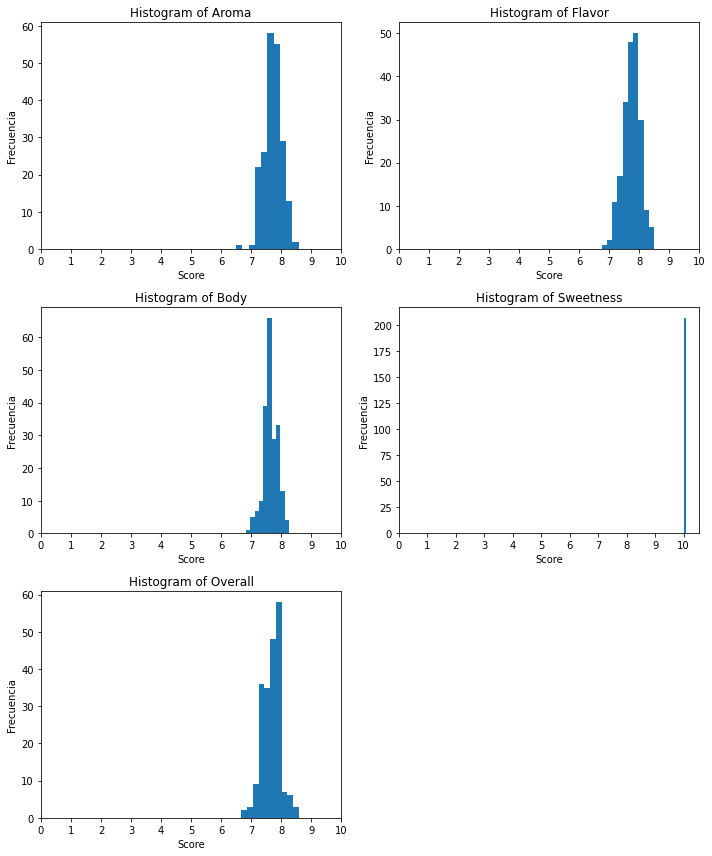

In [133]:
import matplotlib.pyplot as plt
import numpy as np

vars = ['Aroma', 'Flavor', 'Body', 'Sweetness', 'Overall']

plt.figure(figsize = (10, 12))

for i, var in enumerate(vars):
    # print(i, var)

    # Constructing the subplots
    plt.subplot(3, 2, i + 1)

    # Plotting each data
    plt.hist(coffee[var], 10)

    # Setting the ticks of xlabel
    plt.xticks(np.arange(0, 11, 1.0))

    # Title and labelling
    title_string = 'Histogram of ' + var
    plt.title(title_string)
    plt.xlabel('Score');plt.ylabel('Frecuencia')
    
    # Layaout space between figures
    plt.tight_layout()

In [134]:
import numpy as np

vars = ['Aroma', 'Flavor', 'Body', 'Sweetness', 'Overall']

for var in vars:
    print('Mean of '+ var + ':   \t' + str(round(np.mean(coffee[var]), 2)))

print('\n')

for var in vars:
    print('Median of '+ var + ':   \t' + str(round(np.median(coffee[var]), 2)))

Mean of Aroma:   	7.72
Mean of Flavor:   	7.74
Mean of Body:   	7.64
Mean of Sweetness:   	10.0
Mean of Overall:   	7.68


Median of Aroma:   	7.67
Median of Flavor:   	7.75
Median of Body:   	7.67
Median of Sweetness:   	10.0
Median of Overall:   	7.67


In [154]:
for country in coffee['Country of Origin'].unique():
    print(country)
    print(coffee[coffee['Country of Origin'] == country]['Overall'].mean().round(2))

Colombia
7.67
Taiwan
7.81
Laos
7.64
Costa Rica
7.81
Guatemala
7.79
Tanzania, United Republic Of
7.79
Ethiopia
7.86
Thailand
7.48
Brazil
7.38
United States (Hawaii)
7.67
Kenya
7.75
Uganda
7.78
Indonesia
7.69
Peru
7.4
Panama
7.62
Nicaragua
7.37
Vietnam
7.54
Honduras
7.59
El Salvador
7.23
Madagascar
7.83
Mexico
7.48
Myanmar
7.58


# 4. Análisis multivariado

## 4.1. Temporalidad de los cargamentos

Quienes le contratan desean saber cuál ha sido el desarrollo de las importaciones a lo largo del tiempo. Por ello, a partir de la variable `Harvest Year` haga una distribución del número de cargamentos por año de recolección. 

> **Nota:** si hay dos años, utilice el primero.

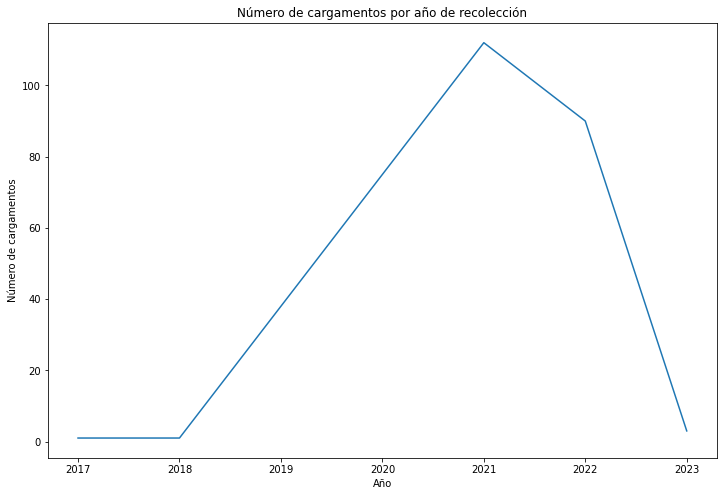

In [136]:
import matplotlib.pyplot as plt

# Creating a variable for year
coffee['year'] = coffee['Harvest Year'].str.split(" / ", expand = True)[0].astype(int)

# Grouping shipments
df_temp = coffee[['ID', 'year']].groupby('year').count()\
    .reset_index()\
    .rename(columns = {'ID': 'cargamentos'})

# Creating figure
plt.figure(figsize = (12, 8))

# Plotting
plt.plot('year', 'cargamentos', data = df_temp)

# Title and labelling
plt.title('Número de cargamentos por año de recolección')
plt.xlabel('Año'); plt.ylabel('Número de cargamentos')

# Showing
plt.show()

Sin embargo, le dicen que tal vez el número de cargamentos no dice mucho acerca de las lógicas de comercio de café. Por eso le piden que utilice las variables del número de sacos comercializados (`Number of Bags`) y el peso promedio de los sacos de café (`Bad Weight`) para construir una variable del peso promedio del cargamento (`total_weight`) que tenga el peso promedio del cargamento entero. Es decir, una variable en la que se multipliquen ambos.

Con ella le piden que haga una gráfica que muestre el peso sumado de todas las comercializaciones por año: 

In [137]:
# Preprocessing Bad Weight to drop kg string
coffee['bag_weight'] = coffee['Bag Weight'].str.split(expand = True)[0].astype(float)

# Creating the new weight variable
coffee['total_weight'] = coffee['bag_weight'] * coffee['Number of Bags']
coffee[['bag_weight', 'Number of Bags', 'total_weight']]

,bag_weight,Number of Bags,total_weight
0,35.0,1,35.0
1,80.0,1,80.0
2,25.0,19,475.0
3,22.0,1,22.0
4,24.0,2,48.0
...,...,...,...
202,60.0,2240,134400.0
203,30.0,300,9000.0
204,60.0,343,20580.0
205,2.0,1,2.0


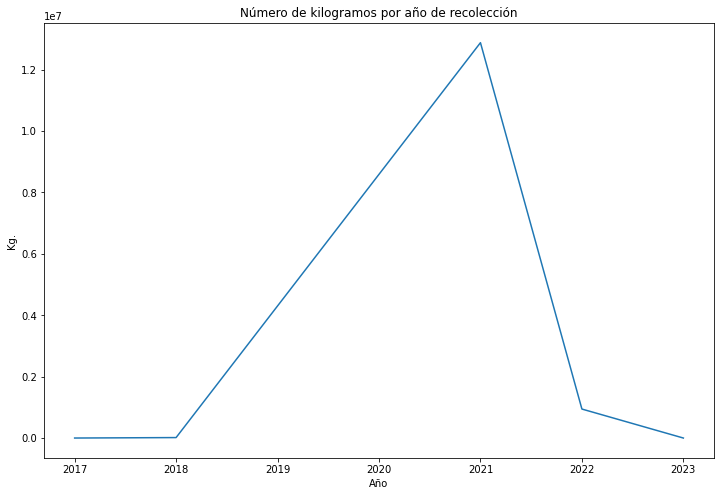

In [138]:
import matplotlib.pyplot as plt

# Grouping shipments
df_temp = coffee[['total_weight', 'year']].groupby('year').sum()\
    .reset_index()

# Creating figure
plt.figure(figsize = (12, 8))

# Plotting
plt.plot('year', 'total_weight', data = df_temp)

# Title and labelling
plt.title('Número de kilogramos por año de recolección')
plt.xlabel('Año'); plt.ylabel('Kg.')

# Showing
plt.show()

A partir de lo anterior, 

* ¿Qué observa? ¿Cambian los patrones de comercialización?

## 4.2. Puntaje de las tazas por país de origen

Resulta que quienes le contrataron también tienen alto interés en la conformación del puntaje del café: un café mejor puntuado tiene una mayor probabilidad de ser comercializado. Por ello, quisieran saber en dónde deben comprar el café que mejor les garantice un puntaje de las tazas.

Por ello, le piden que haga un análisis de la distribución del puntaje de las tazas por país de origen. Le sugieren hacer un boxplot del puntaje total de la taza calificada (`Total Cup Points`) por el país de origen del café (`Country of Origin`).

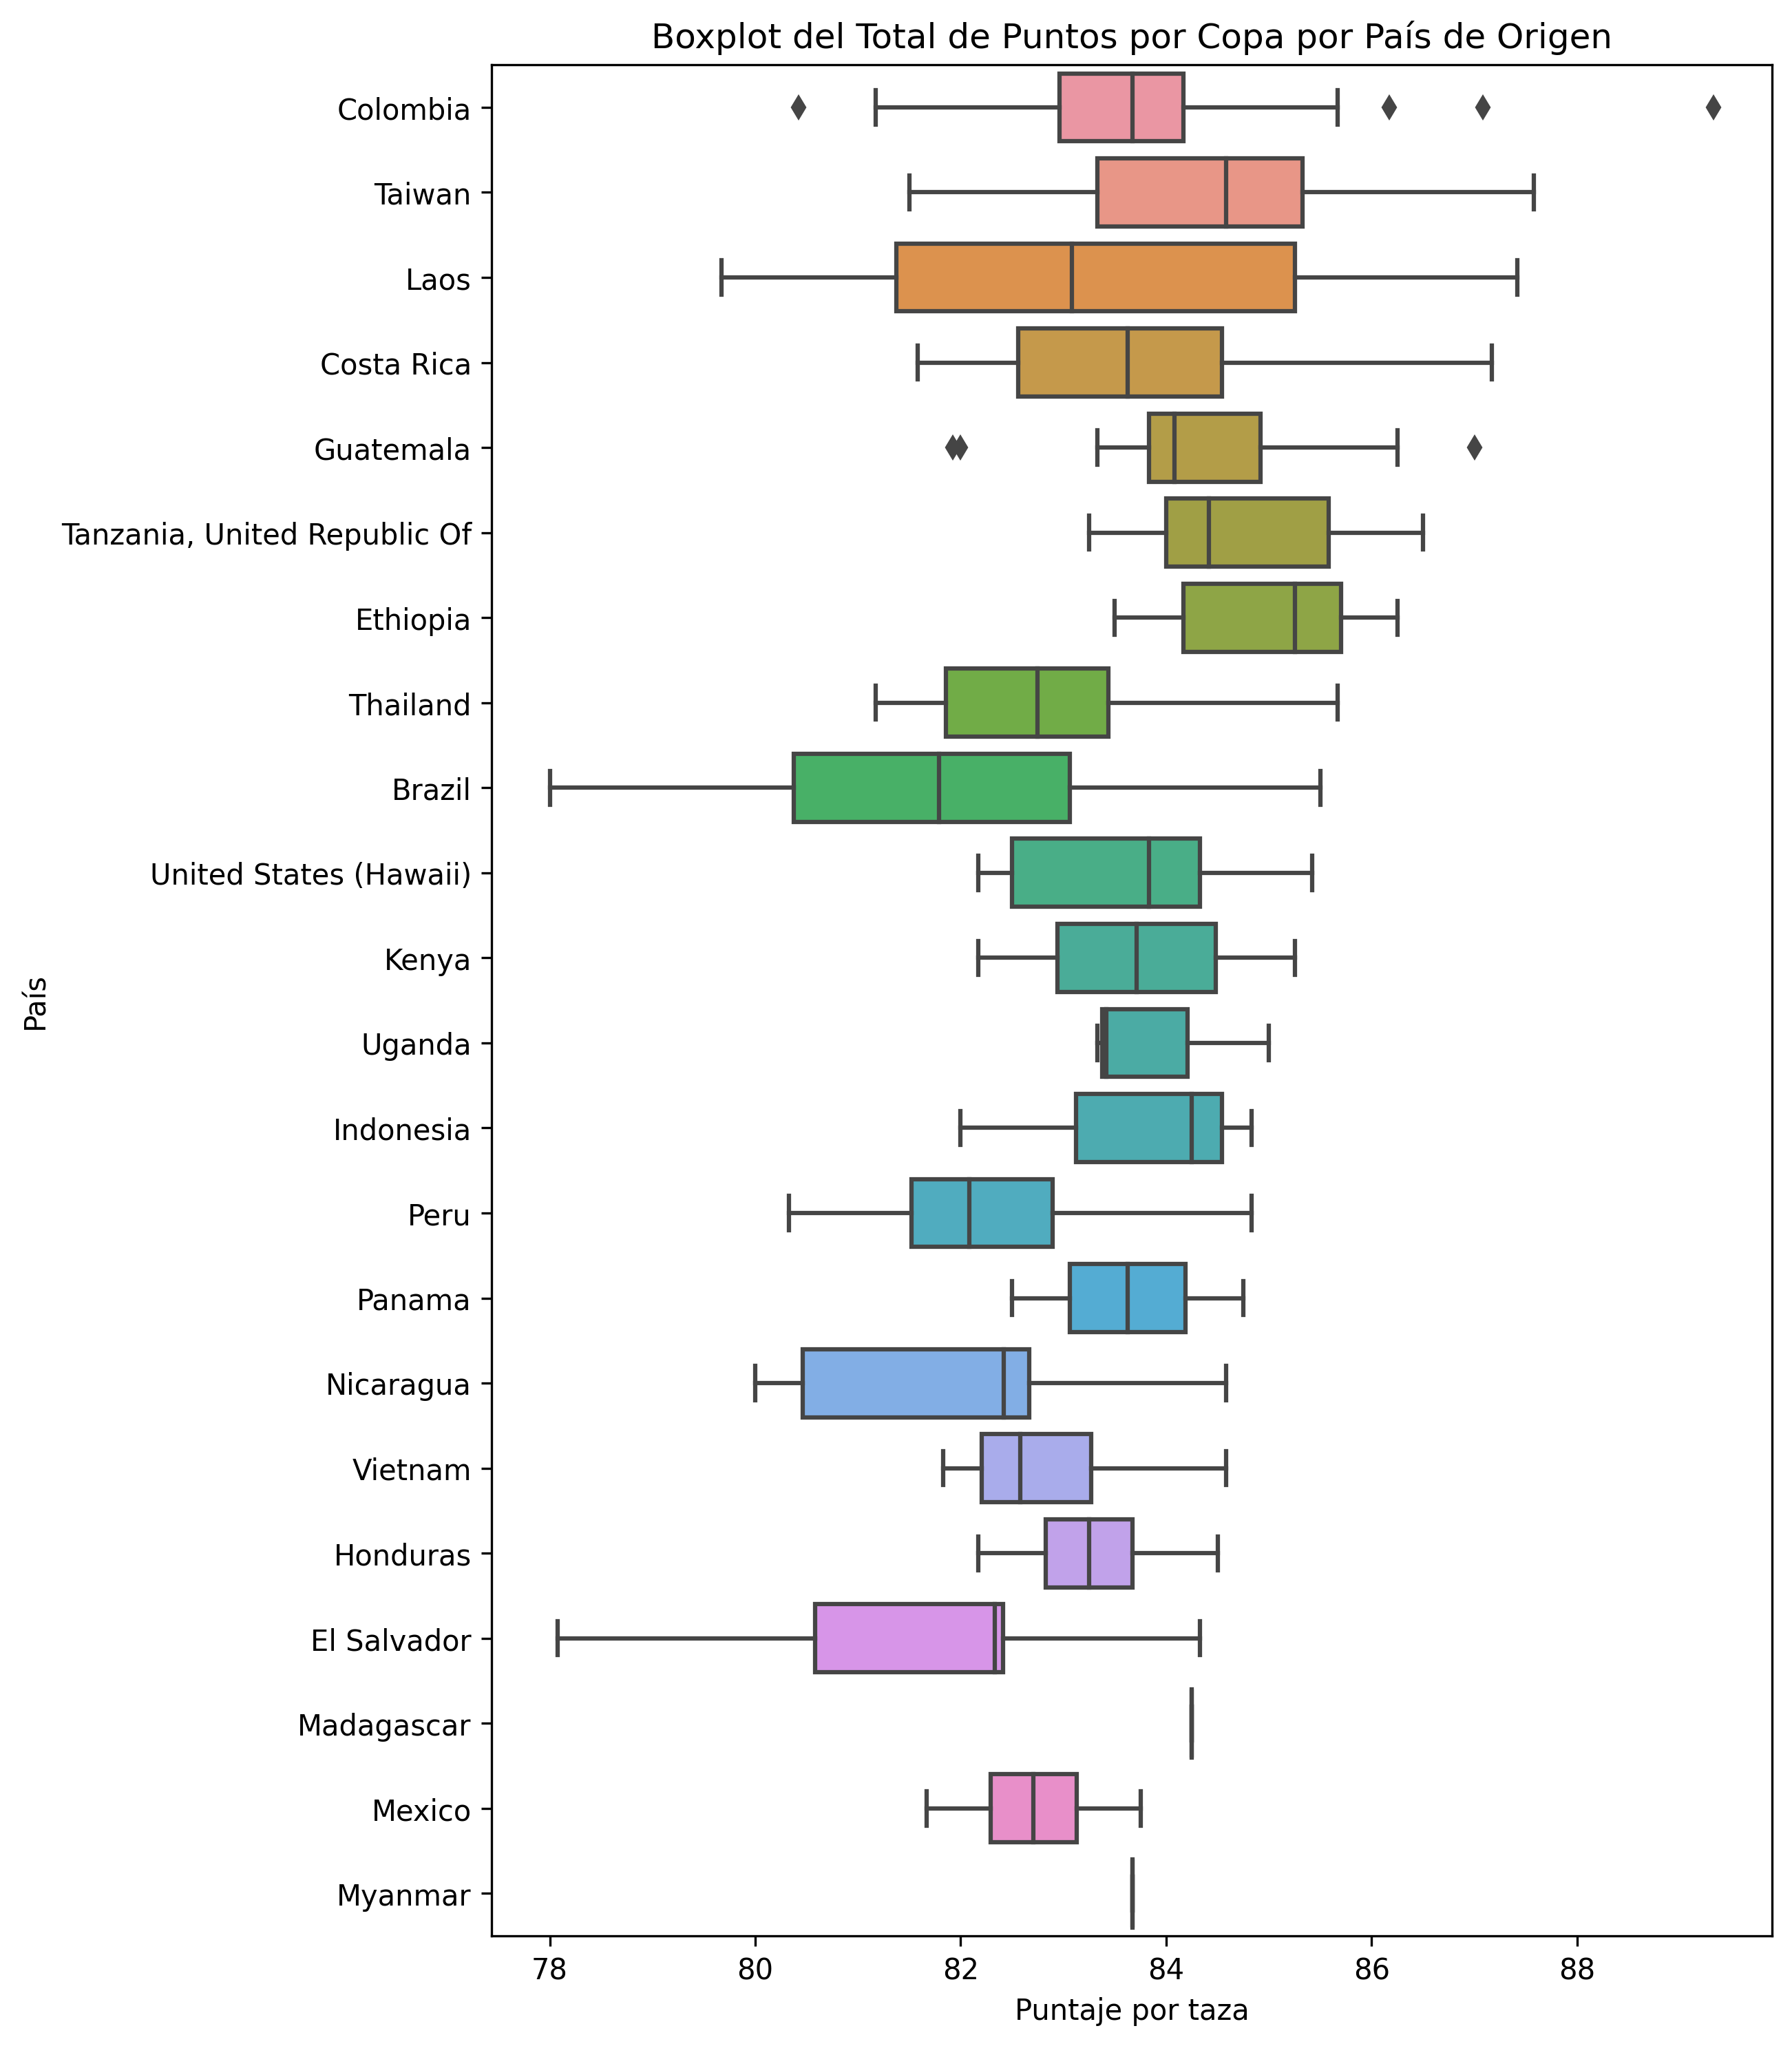

In [177]:
import seaborn as sns

# Tamaño de la gráfica
plt.figure(figsize=(8, 12), dpi = 300) 

# Boxplot
sns.boxplot(y = 'Country of Origin', x = 'Total Cup Points', data = coffee) # Se genera la gráfica: boxplot

# Cambio de los títulos de los ejes X e Y
plt.ylabel("País"); plt.xlabel("Puntaje por taza") # Eje Y y X

# Cambio del título de la gráfica
plt.title("Boxplot del Total de Puntos por Copa por País de Origen") # Título de la gráfica

# Se muestra la gráfica
plt.show()

A partir de ello,

* ¿Qué observa? ¿Cuáles son los países que consistentemente mantienen una mejor calidad en las tazas que se han calificado?
* ¿De qué país le recomendaría a sus clientes que compraran para el procesamiento de su producto de café?

## 4.3. Puntaje total

Por tanto, le piden que encuentre la correlación entre los diferentes puntajes (`Aroma`, `Flavor`, `Aftertaste`, `Acidity`, `Body`, `Balance`, `Uniformity`, `Clean Cup`, `Sweetness`) con los puntos por taza de café (`Total Cup Points`)

In [152]:
vars = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
'Body', 'Balance', 'Uniformity', 'Clean Cup', 
'Sweetness', 'Total Cup Points']

cor_matrix = coffee[vars].corr()

cor_matrix['Total Cup Points'].sort_values(ascending = False)

Total Cup Points    1.000000
Flavor              0.939124
Aftertaste          0.934813
Balance             0.929520
Acidity             0.897057
Aroma               0.868919
Body                0.847216
Uniformity          0.003556
Clean Cup                NaN
Sweetness                NaN
Name: Total Cup Points, dtype: float64

A partir de lo anterior, 

* ¿Cuáles son las variables que más están correlacionadas con el puntaje final?
* ¿Qué aspectos del café recomendaría a sus clientes enfocarse para mejorar el puntaje de su café?